# Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_table("data/u.data", names=col_names)
data.drop('timestamp', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
user_id    100000 non-null int64
item_id    100000 non-null int64
rating     100000 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


In [3]:
data.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


# Explore

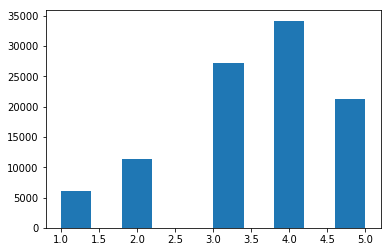

In [4]:
plt.hist(data.rating);

In [4]:
# Sparsity of the dataset
Number_Ratings = len(data)
Number_Movies = len(np.unique(data.item_id))
Number_Users = len(np.unique(data.user_id))

Sparsity = (Number_Ratings * 100) / (Number_Movies * Number_Users)
print("Sparsity = {}".format(Sparsity))

Sparsity = 6.304669364224532


# Model

## Split

In [5]:
train, test = train_test_split(data, test_size=0.3)

pip install --upgrade --no-cache-dir https://get.graphlab.com/GraphLab-Create/2.1/biswa.travel@gmail.com/6D77-0454-47EB-C253-4EFA-A145-0328-C044

In [7]:
import graphlab

sf = graphlab.SFrame(data)

ModuleNotFoundError: No module named 'graphlab'

In [7]:
import turicreate as tc

sf = tc.SFrame(data)

ModuleNotFoundError: No module named 'turicreate'

In [ ]:
sf_train, sf_test = sf.random_split(0.9, seed=1)
print(len(df_train), len(sf_test))

## Popularity recommender 

Recommend items based on the popularity of the item

In [ ]:
pr_model = graphlab.popularity_recommender.create(sf_train, target='rating')

## Item-item similarity recommender

In [ ]:
itit_model = graphlab.item_similarity_recommender.create(sf_train, target='rating')
itit_rec = itit_model.recommend(k=5)
itit_rec.print_rows(10)

## Validate

In [ ]:
# Precision / recall
graphlab.recommender.util.compare_models(sf_test, [pr_model, itit_model], metric='precision_recall', target='rating')